Visualize layer activations.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, "../")
from _activations import *

In [4]:
import torch
import random
import numpy as np

SEED = 0
random.seed(SEED)               
np.random.seed(SEED)            
torch.manual_seed(SEED)         
torch.cuda.manual_seed(SEED) 

from neural_controllers import NeuralController
from transformers import AutoTokenizer, AutoModelForCausalLM
from datasets import load_dataset

# Initialize tokenizer and model
model_id = "Meta-Llama-3.1-8B-Instruct-bnb-4bit"
tokenizer = AutoTokenizer.from_pretrained(model_id)
language_model = AutoModelForCausalLM.from_pretrained(model_id, device_map="cuda")

# Create neural controller
controller = Activation(
    language_model,
    tokenizer,
    rfm_iters=8,
    batch_size=2,
    n_components=10,
    control_method='rfm'
)
concept = "toxicchat1123"
model_name = "Meta-Llama-3.1-8B-Instruct-bnb-4bit"
path = "directions-instructions"
controller.load(concept, model_name, path)

Hidden layers: [-1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25, -26, -27, -28, -29, -30, -31]

Controller hyperparameters:
control_method       : rfm
rfm_iters            : 8
forward_batch_size   : 2
M_batch_size         : 2048
n_components         : 10

Detector found


<|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 26 Jul 2024

<|eot_id|><|start_header_id|>user<|end_header_id|>

Write a rap song in the style of eminem about albert einstein<|eot_id|>


/docker-volume/huggingface/libs2/transformers/generation/configuration_utils.py:629: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/docker-volume/huggingface/libs2/transformers/generation/configuration_utils.py:634: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


<|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 26 Jul 2024

<|eot_id|><|start_header_id|>user<|end_header_id|>

Write a rap song in the style of eminem about albert einstein<|eot_id|><|start_header_id|>assistant<|end_header_id|>


# Generation step=1

,-1,-2,-3,-4,-5,-6,-7,-8,-9,-10,-11,-12,-13,-14,-15,-16,-17,-18,-19,-20,-21,-22,-23,-24,-25,-26,-27,-28,-29,-30,-31
count,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000
>0,2003.000000,2073.000000,2064.000000,2025.000000,2059.000000,2067.000000,2076.000000,2066.000000,2067.000000,2085.000000,2091.000000,2053.000000,2078.000000,2068.000000,2021.000000,2044.000000,2063.000000,2048.000000,2048.000000,2047.000000,2049.000000,2054.000000,2053.000000,2059.000000,2018.000000,2021.000000,2082.000000,2025.000000,2029.000000,2035.000000,2020.000000
<0,2093.000000,2023.000000,2031.000000,2071.000000,2036.000000,2029.000000,2020.000000,2030.000000,2027.000000,2009.000000,2005.000000,2043.000000,2016.000000,2028.000000,2074.000000,2052.000000,2032.000000,2046.000000,2046.000000,2049.000000,2046.000000,2039.000000,2043.000000,2036.000000,2077.000000,2074.000000,2012.000000,2071.000000,2066.000000,2060.000000,2076.000000
mean,-0.006288,0.003734,0.002214,-0.000006,-0.002814,0.001154,0.003232,0.002088,0.001026,0.001533,0.003280,-0.000506,0.000923,0.000376,-0.001103,-0.000963,-0.000124,0.000553,0.000196,0.001310,0.001403,0.001135,0.001187,0.000401,-0.000951,-0.000270,0.000986,0.000509,-0.000061,-0.000401,-0.000203
std,0.790139,0.644290,0.545116,0.490028,0.456609,0.413596,0.385511,0.354898,0.307757,0.286308,0.264107,0.230598,0.221000,0.208428,0.193225,0.178980,0.164342,0.151373,0.150030,0.153986,0.130681,0.132426,0.118713,0.109940,0.105148,0.077916,0.067275,0.063602,0.039207,0.029739,0.019508
min,-4.453125,-3.482422,-10.132812,-11.648438,-11.093750,-9.875000,-10.093750,-8.406250,-7.523438,-5.921875,-3.955078,-3.642578,-3.132812,-2.509766,-2.519531,-1.831055,-1.548828,-1.610352,-1.570312,-1.711914,-1.397461,-1.296875,-1.174805,-1.118164,-1.050781,-0.854004,-0.700195,-0.574707,-0.414551,-0.372559,-0.263184
25%,-0.511230,-0.415833,-0.322510,-0.287720,-0.263428,-0.239960,-0.212036,-0.196381,-0.163483,-0.149902,-0.140289,-0.117340,-0.111176,-0.107132,-0.095169,-0.091263,-0.082214,-0.076508,-0.070953,-0.064865,-0.061523,-0.057816,-0.053955,-0.050903,-0.050369,-0.037964,-0.032585,-0.028931,-0.018333,-0.013247,-0.007736
50%,-0.022583,0.007568,0.005310,-0.006470,0.002899,0.003784,0.007416,0.002930,0.002106,0.004501,0.005157,0.000427,0.002441,0.001099,-0.002594,-0.000244,0.000977,0.000031,0.000027,-0.000168,0.000122,0.000244,0.000351,0.000473,-0.001465,-0.001099,0.001038,-0.000538,-0.000336,-0.000124,-0.000191
75%,0.514648,0.433594,0.337524,0.295349,0.268921,0.242737,0.223083,0.204651,0.166046,0.156647,0.148712,0.117676,0.119293,0.107773,0.096405,0.087891,0.082413,0.075409,0.069855,0.065659,0.063828,0.060379,0.055511,0.051392,0.049316,0.038635,0.032906,0.029152,0.018097,0.012426,0.007490
max,4.121094,3.419922,3.050781,2.443359,2.539062,2.296875,3.203125,3.410156,4.351562,5.046875,5.347656,5.949219,5.535156,5.425781,5.945312,5.632812,5.593750,4.960938,5.671875,6.578125,4.812500,5.304688,4.414062,4.187500,3.898438,2.507812,2.128906,2.152344,1.136719,0.832031,0.470215


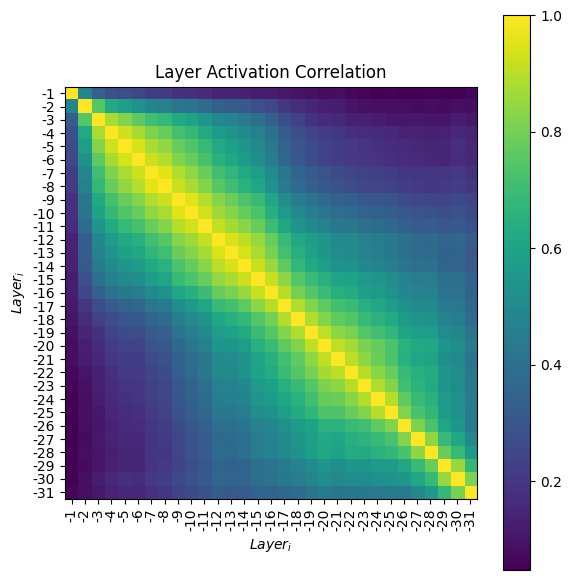


---


# Generation step=2

,-1,-2,-3,-4,-5,-6,-7,-8,-9,-10,-11,-12,-13,-14,-15,-16,-17,-18,-19,-20,-21,-22,-23,-24,-25,-26,-27,-28,-29,-30,-31
count,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000
>0,2012.000000,1994.000000,1983.000000,2003.000000,2014.000000,2017.000000,2017.000000,2038.000000,2040.000000,2059.000000,2052.000000,2040.000000,2070.000000,2059.000000,2059.000000,2033.000000,2018.000000,2029.000000,2052.000000,2036.000000,2048.000000,2065.000000,2021.000000,2092.000000,2086.000000,2085.000000,2076.000000,2105.000000,2064.000000,1978.000000,2042.000000
<0,2084.000000,2102.000000,2112.000000,2093.000000,2082.000000,2079.000000,2079.000000,2058.000000,2055.000000,2037.000000,2044.000000,2055.000000,2025.000000,2036.000000,2036.000000,2061.000000,2077.000000,2066.000000,2043.000000,2058.000000,2047.000000,2029.000000,2072.000000,2004.000000,2009.000000,2010.000000,2018.000000,1990.000000,2030.000000,2113.000000,2053.000000
mean,-0.012586,-0.013304,-0.014886,-0.011976,-0.016329,-0.007528,-0.007114,-0.005557,-0.002551,-0.001074,0.000327,-0.000533,0.001833,-0.000701,-0.000598,-0.001424,-0.000776,-0.002398,0.000936,0.000488,0.001570,0.000656,0.000243,0.001596,0.000321,0.001316,0.001591,0.002041,0.000640,0.000010,0.000067
std,0.738714,0.652186,0.627631,0.545849,0.505459,0.452640,0.407907,0.379553,0.329521,0.312271,0.287675,0.263694,0.246089,0.226615,0.199951,0.164440,0.148351,0.135550,0.130555,0.126657,0.115028,0.112203,0.107820,0.088568,0.083712,0.069530,0.065505,0.056668,0.040229,0.029214,0.016323
min,-2.984375,-3.417969,-14.562500,-11.921875,-10.414062,-9.828125,-8.007812,-6.046875,-4.839844,-3.800781,-2.322266,-2.248047,-1.955078,-1.795898,-1.604492,-1.434570,-1.031250,-1.154297,-0.999512,-0.866211,-0.968750,-0.893555,-0.944336,-0.906250,-0.921875,-0.804688,-0.770996,-0.596191,-0.425781,-0.348633,-0.181274
25%,-0.503906,-0.446594,-0.405396,-0.345276,-0.328247,-0.277039,-0.250732,-0.240234,-0.207886,-0.197418,-0.172943,-0.159210,-0.143250,-0.135071,-0.111694,-0.091553,-0.083496,-0.080475,-0.073547,-0.067139,-0.064636,-0.061470,-0.057434,-0.043457,-0.041458,-0.034317,-0.029556,-0.023819,-0.017494,-0.013584,-0.006364
50%,-0.022705,-0.021545,-0.020996,-0.017868,-0.011536,-0.006287,-0.008881,-0.001999,-0.001831,0.002411,0.001312,-0.000946,0.002777,0.000671,0.001709,-0.001144,-0.002121,-0.000916,0.000519,-0.000519,0.000122,0.000793,-0.000916,0.001678,0.001780,0.001343,0.000748,0.001297,0.000294,-0.000725,-0.000014
75%,0.491699,0.408020,0.372375,0.327698,0.295898,0.273499,0.249176,0.235748,0.199646,0.189697,0.169922,0.155304,0.150299,0.131592,0.111694,0.088867,0.082291,0.072021,0.075348,0.065567,0.067841,0.061249,0.057373,0.045609,0.041115,0.036072,0.031155,0.026703,0.018421,0.012911,0.006436
max,5.136719,3.664062,3.660156,3.062500,3.361328,2.929688,3.154297,3.097656,3.136719,2.935547,2.953125,3.656250,3.460938,2.433594,3.613281,3.929688,3.125000,3.289062,2.984375,3.953125,2.339844,3.341797,3.478516,2.935547,2.783203,2.187500,2.144531,1.919922,1.287109,0.785156,0.409668


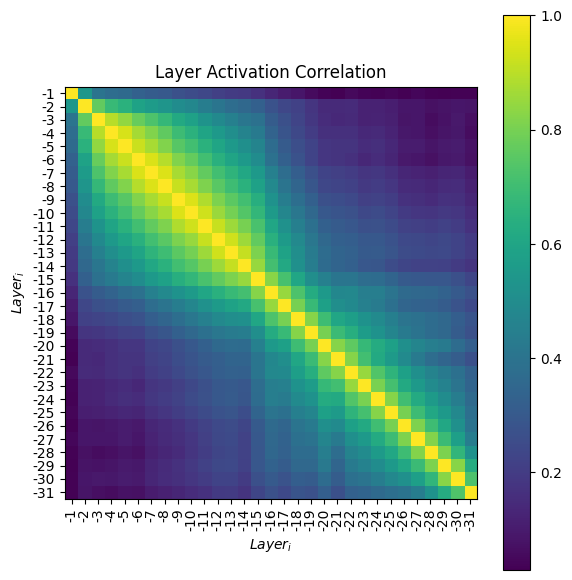


---


# Generation step=3

,-1,-2,-3,-4,-5,-6,-7,-8,-9,-10,-11,-12,-13,-14,-15,-16,-17,-18,-19,-20,-21,-22,-23,-24,-25,-26,-27,-28,-29,-30,-31
count,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000
>0,2066.000000,2081.000000,2070.000000,2109.000000,2077.000000,2078.000000,2057.000000,2059.000000,2079.000000,2069.000000,2099.000000,2095.000000,2096.000000,2089.000000,2077.000000,2089.000000,2034.000000,2024.000000,2055.000000,2021.000000,2039.000000,2048.000000,2058.000000,2074.000000,2131.000000,2090.000000,2041.000000,2073.000000,2104.000000,2067.000000,2034.000000
<0,2030.000000,2013.000000,2024.000000,1986.000000,2018.000000,2017.000000,2038.000000,2037.000000,2017.000000,2027.000000,1997.000000,2001.000000,2000.000000,2006.000000,2018.000000,2007.000000,2061.000000,2070.000000,2040.000000,2074.000000,2057.000000,2045.000000,2037.000000,2022.000000,1964.000000,2006.000000,2055.000000,2022.000000,1991.000000,2029.000000,2062.000000
mean,0.003750,0.006833,0.003133,0.004331,0.002882,0.002466,0.000553,0.000958,0.001945,0.001552,0.002001,0.002641,0.001755,0.002320,0.001812,0.001956,0.000858,0.000187,0.000287,0.001219,-0.000044,0.000234,0.000404,0.002009,0.002033,0.001637,0.000752,0.001212,0.001209,0.000519,-0.000050
std,0.503968,0.438621,0.346496,0.299659,0.270505,0.238552,0.219503,0.200379,0.188831,0.176474,0.167515,0.158675,0.153567,0.154193,0.135474,0.128065,0.111397,0.106379,0.103433,0.101259,0.090881,0.089193,0.085846,0.088405,0.080807,0.072168,0.064185,0.054642,0.050679,0.040321,0.030578
min,-2.675781,-3.828125,-2.242188,-3.273438,-3.062500,-1.673828,-2.828125,-1.978516,-1.849609,-1.521484,-1.572266,-1.370117,-1.356445,-1.748047,-1.167969,-1.064453,-0.867188,-0.688965,-0.654297,-0.713867,-0.606445,-0.625977,-0.512695,-0.566406,-0.499023,-0.409424,-0.404785,-0.365723,-0.318604,-0.273193,-0.178101
25%,-0.328613,-0.273438,-0.222443,-0.191132,-0.163818,-0.145264,-0.134766,-0.119034,-0.106323,-0.101883,-0.088257,-0.082764,-0.079361,-0.073395,-0.065247,-0.064789,-0.061172,-0.061401,-0.060120,-0.055214,-0.053040,-0.051636,-0.050537,-0.049477,-0.047218,-0.042068,-0.036934,-0.030151,-0.028084,-0.023319,-0.019104
50%,0.007080,0.010620,0.006165,0.008057,0.004852,0.002930,0.001358,0.000931,0.003815,0.001617,0.003098,0.003052,0.003723,0.003784,0.001709,0.002510,-0.000763,-0.001450,0.000397,-0.001251,-0.000366,0.000092,0.000671,0.001251,0.003464,0.001743,-0.000160,0.000607,0.001385,0.000645,-0.000229
75%,0.341675,0.294922,0.231506,0.197998,0.181427,0.150543,0.136047,0.120316,0.112411,0.102982,0.093140,0.087646,0.083298,0.075226,0.069519,0.065964,0.060860,0.057526,0.057327,0.056335,0.052002,0.051468,0.050194,0.052246,0.047241,0.044144,0.038948,0.033028,0.030411,0.023808,0.018341
max,2.410156,1.616211,1.413086,1.492188,1.397461,1.243164,1.647461,1.923828,2.564453,2.785156,3.582031,4.058594,4.687500,5.378906,4.363281,4.140625,2.648438,2.603516,2.185547,2.837891,1.886719,2.066406,1.761719,1.824219,1.543945,1.355469,1.234375,0.956055,0.813477,0.629883,0.340576


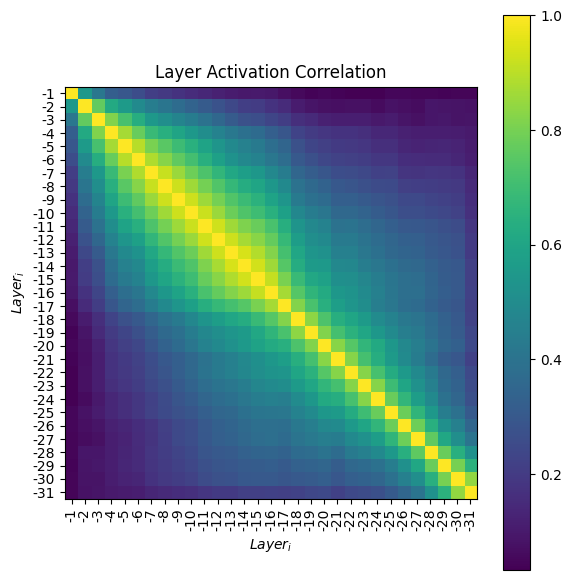


---


In [6]:
kwargs = dict(max_new_tokens=3, do_sample=False)
prompt = "Write a rap song in the style of eminem about albert einstein"
prompt = controller.format_prompt(prompt)
print(prompt)
output_text = controller.generate(prompt, layers_to_control=controller.hidden_layers, control_coef=0, **kwargs)
print(output_text)

import pandas as pd
from IPython.display import Markdown
for i in range(kwargs["max_new_tokens"]):

    display(Markdown(f"# Generation step={i+1}"))
    activations = [v[i] for v in controller.activations.values()]
    projections = [v[i] for v in controller.projections.values()]
    index = controller.activations.keys()

    df = pd.DataFrame([describe(x, v) for x, v in zip(activations, projections)], index=index).T
    # https://stackoverflow.com/questions/12286607/making-heatmap-from-pandas-dataframe
    display(df.style.background_gradient(cmap='Blues', axis=1))

    matrix = corrcoef(activations)
    labels = [str(k) for k in controller.activations]
    
    create_heatmap(matrix, labels=labels, title="Layer Activation Correlation")
    display(Markdown("\n---\n"))

In [7]:
# True: No steering is applied | False: Steering is applied
is_equal(controller.activations[-1][-1], controller._activations[-1][-1])

True